<h1> CNN View </h2>

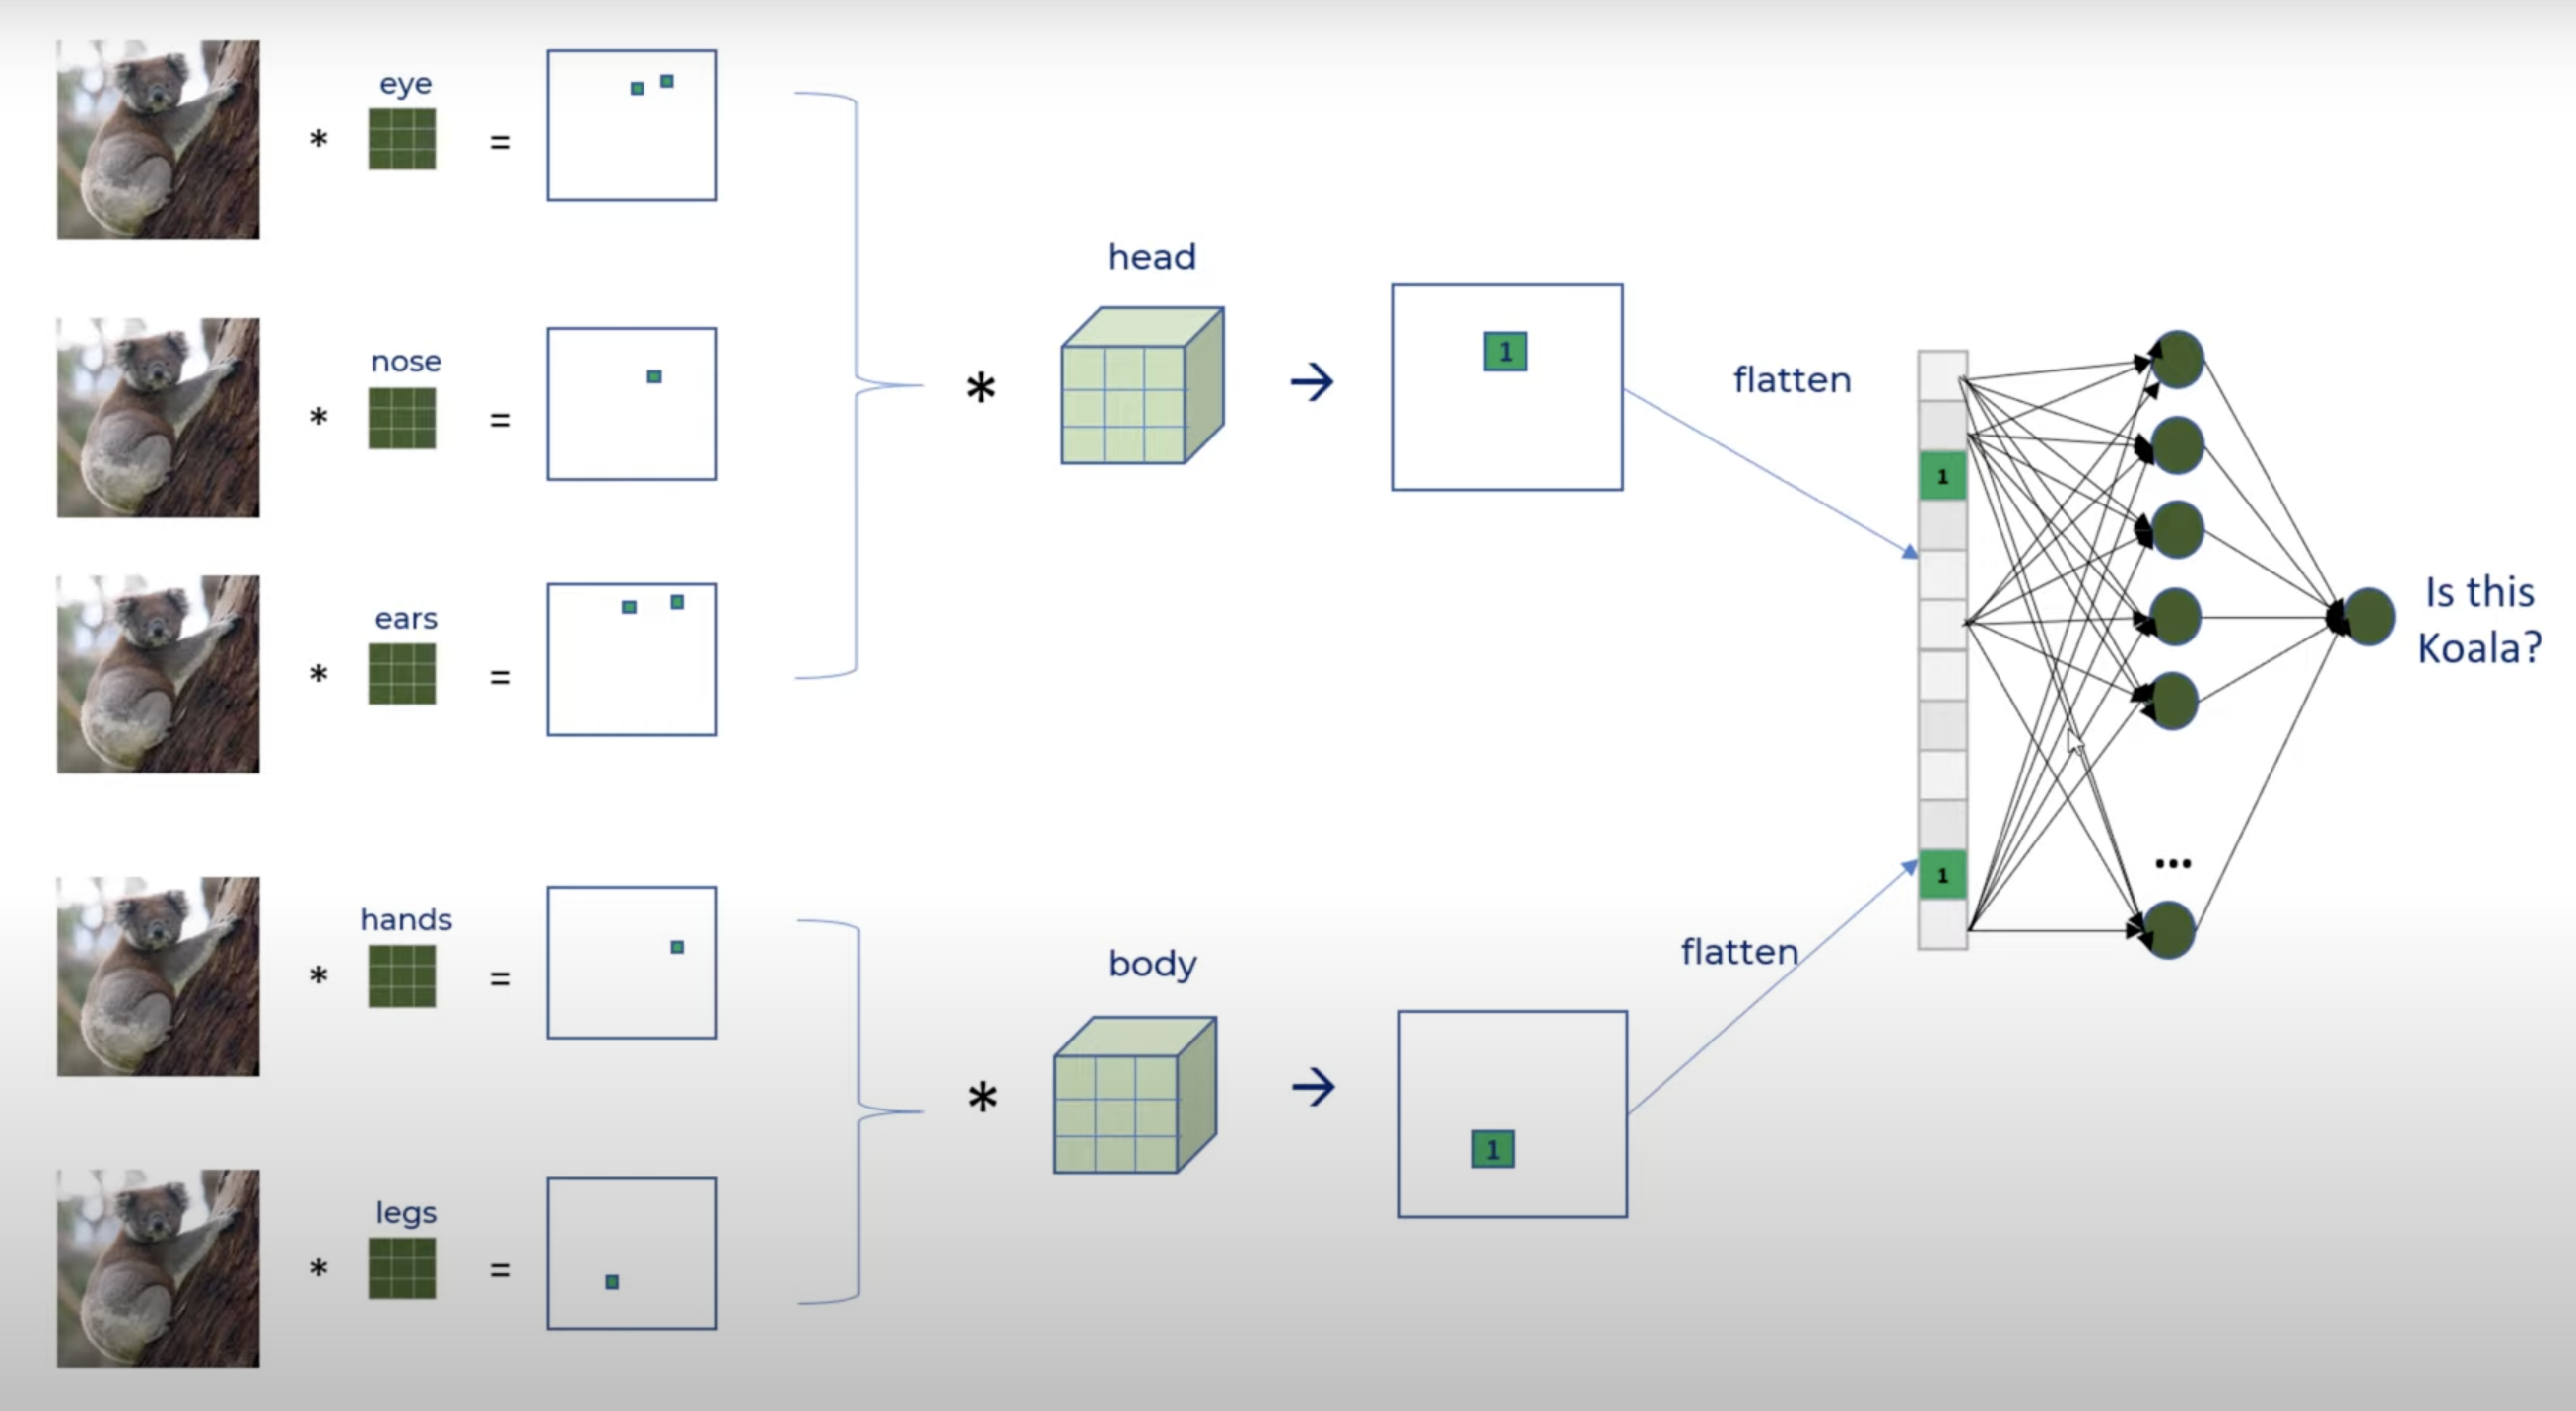

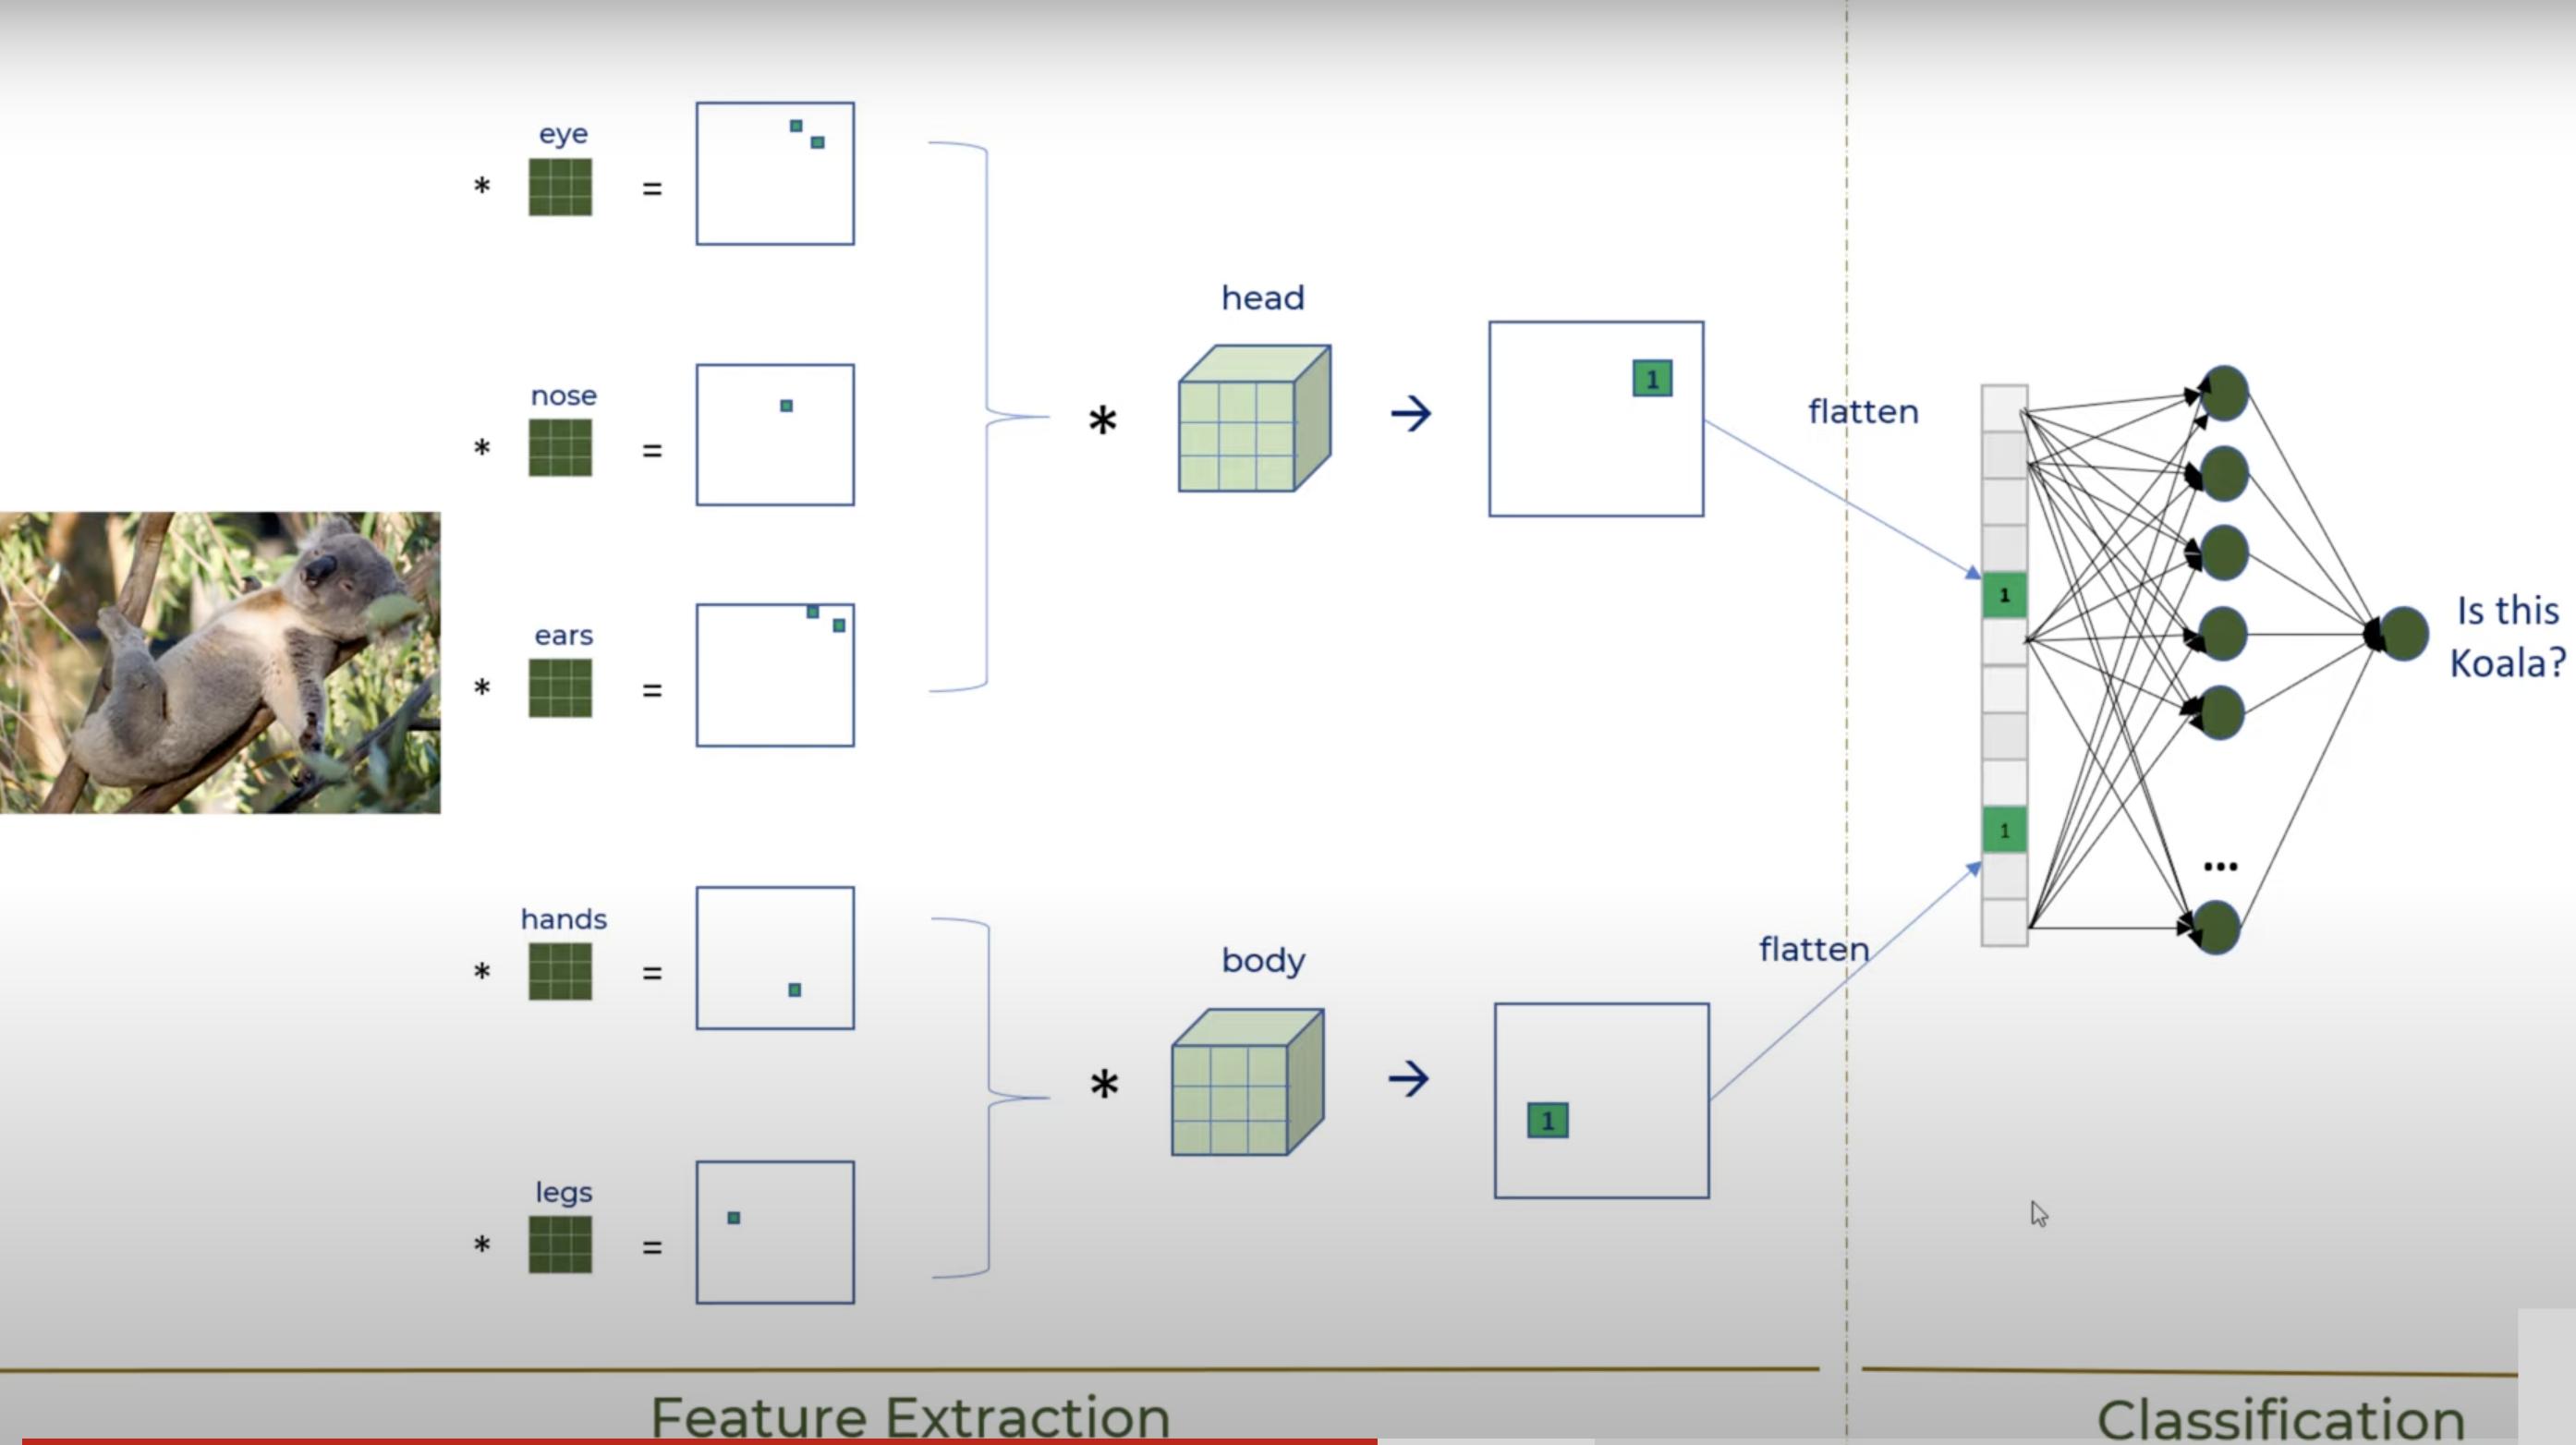

<h2> How to reduce computation power </h2>

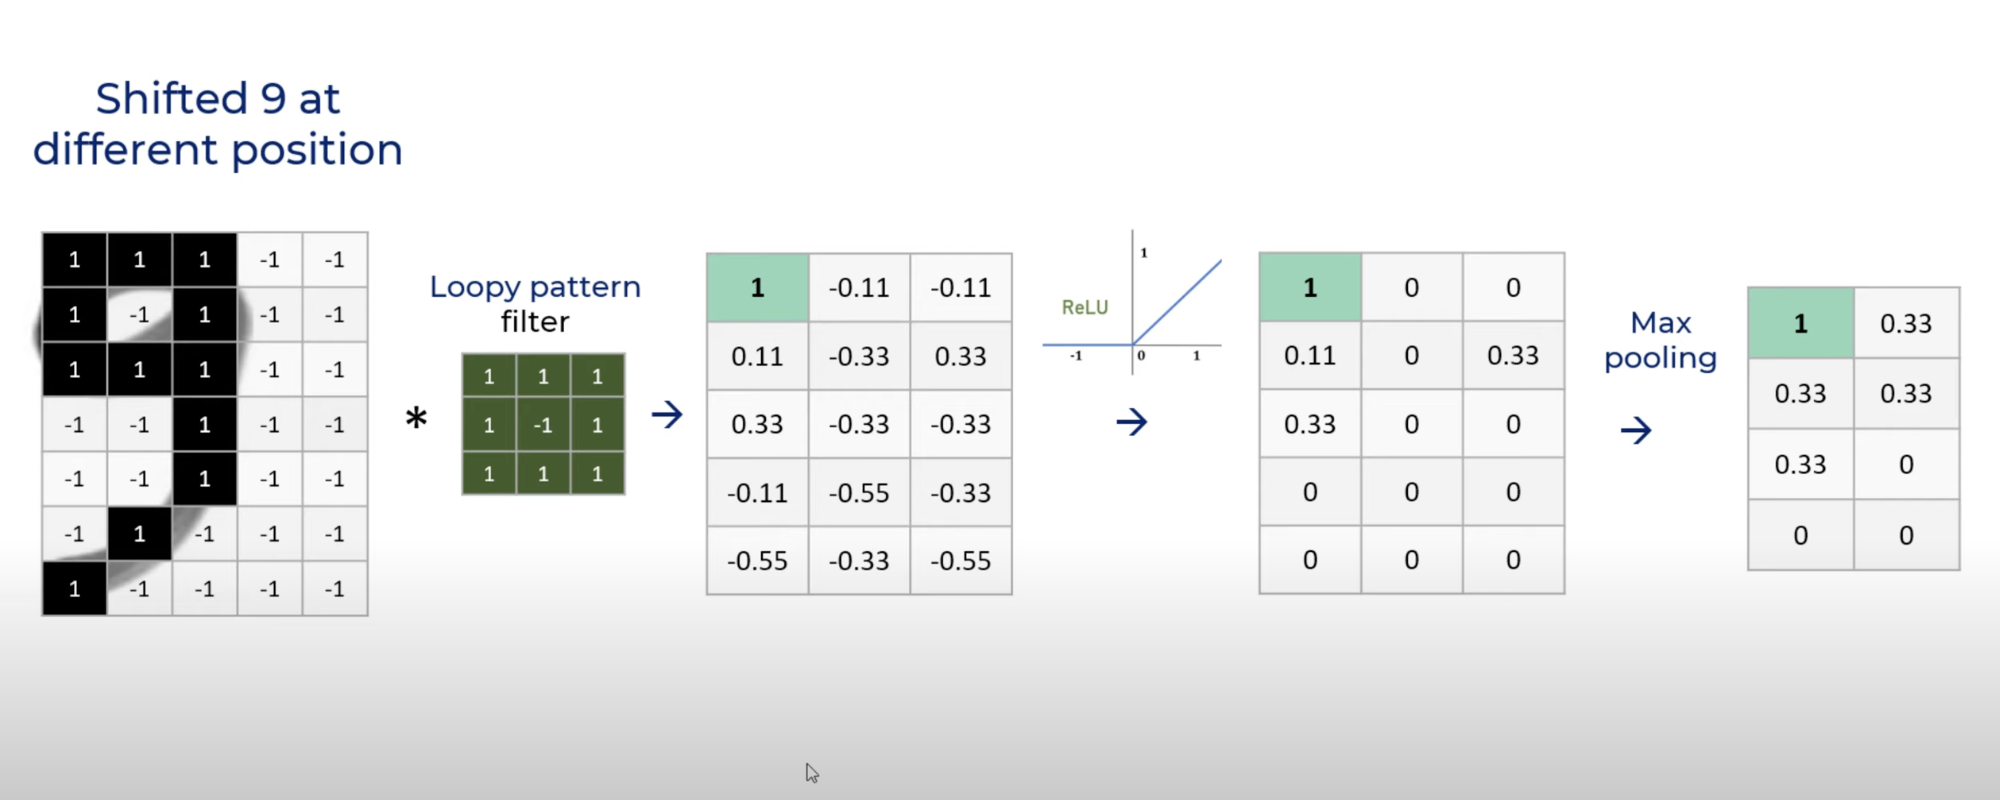

# Overall view

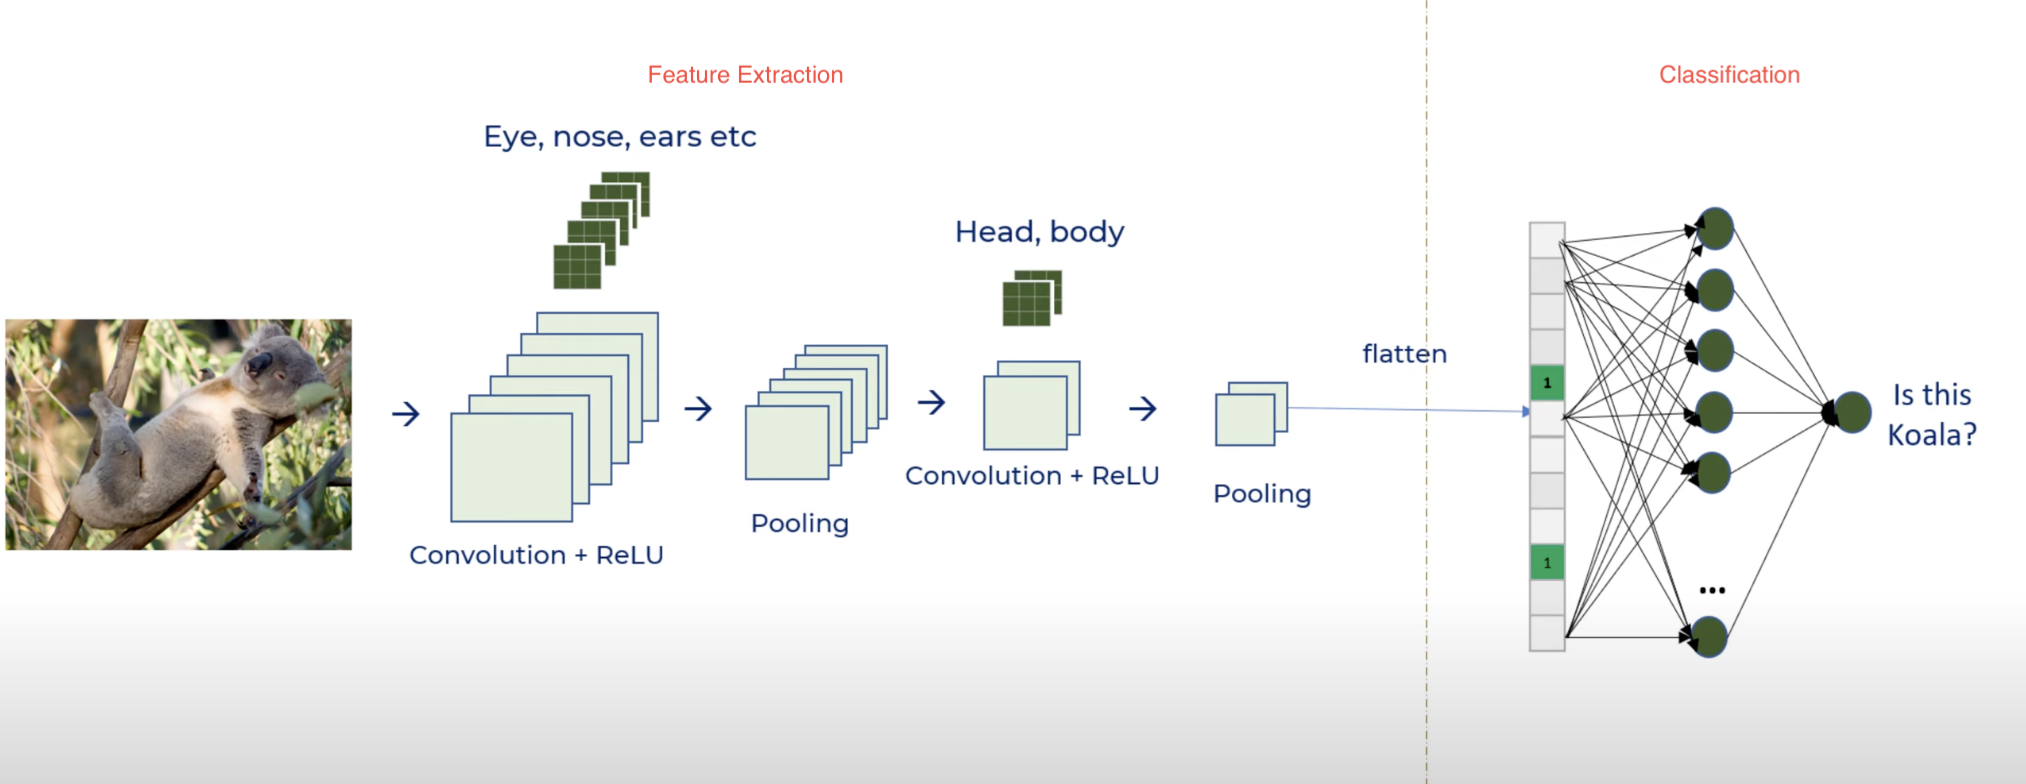

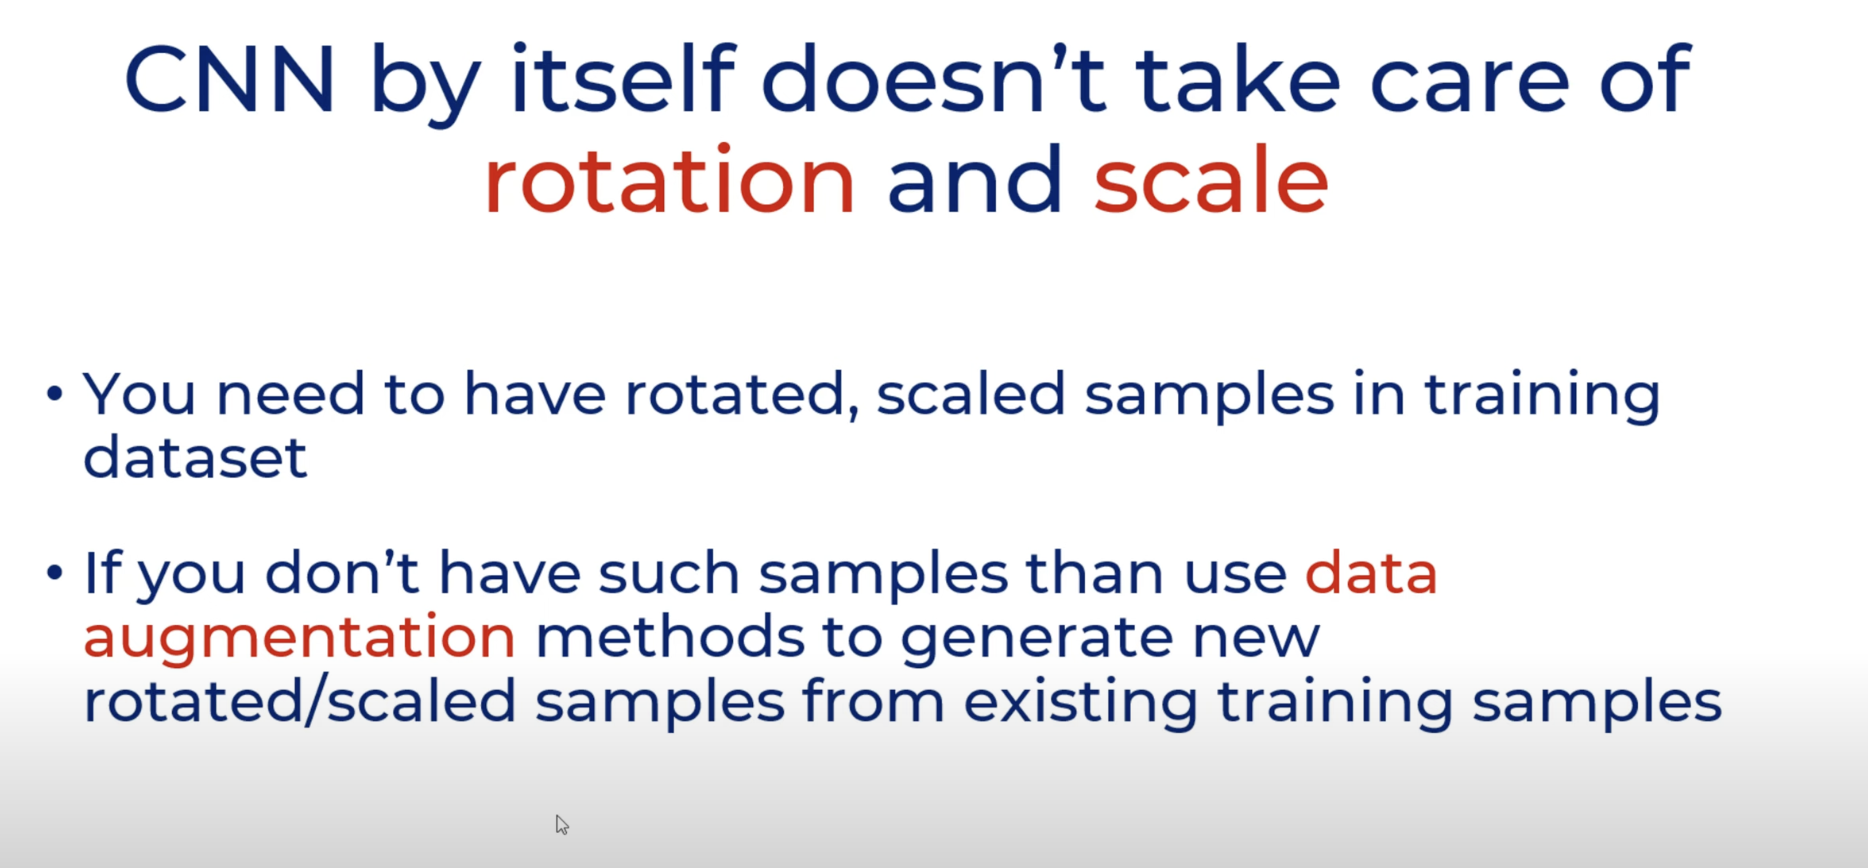

# Lets build the code

<h2 style='color:blue'> Loading data </h2>

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [32]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
x_test.shape

(10000, 32, 32, 3)

In [35]:
y_train =  y_train.reshape(-1,)

<h2 style='color:blue'> Data observation </h2>

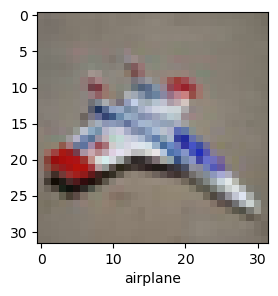

In [36]:
import matplotlib.pyplot as plt
class_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def plot_sample(x,y,index):
    plt.figure(figsize=(15,3))
    plt.imshow(x[index])
    plt.xlabel(class_labels[y[index]])
    
plot_sample(x_train,y_train,30)

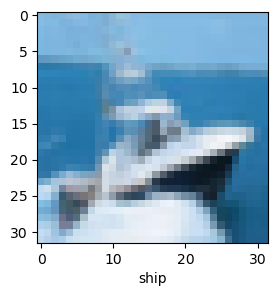

In [37]:
plot_sample(x_train,y_train,8)

<h2 style='color:blue'> Data preprocessing </h2>

In [40]:
x_train = x_train/255
x_test = x_test/255

In [41]:
y_train_categorical = tf.keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = tf.keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

<h2 style='color:blue'> ANN Model </h2>

In [56]:
from tensorflow.keras import datasets, layers, models
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9624 - accuracy: 0.3049
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9891 - accuracy: 0.3199
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 2.7408 - accuracy: 0.2661
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 3.6104 - accuracy: 0.2455
Epoch 5/5
1563/1563 [==============================] - 19s 12ms/step - loss: 4.7286 - accuracy: 0.2316


<h2 style='color:blue'> CNN Model </h2>

In [85]:
cnn = models.Sequential([
        # cnn featuring
        layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPool2D((2,2)),
        layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),
        # dense classification
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')    
    ])

In [86]:
optimizer = keras.optimizers.Adam(lr=0.0001)
cnn.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6011 - accuracy: 0.4184
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3101 - accuracy: 0.5397
Epoch 3/50
  21/1563 [..............................] - ETA: 12s - loss: 1.3128 - accuracy: 0.5461

KeyboardInterrupt: 

In [ ]:
cnn.evaluate(x_test,y_test)